---

# Lecture 8.2 Ensemble Boosting 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/blob/main/Lecture_9/Lecture_9_2.ipynb)

**Boosting** is an ensemble method that trains predictors sequentially, each trying to correct the errors made by the previous predictor. In this lecture we consider two well known boosting methods, namely **AdaBoost** and **gradient boosting**. 

## AdaBoost
With **AdaBoost**, the training algorithm first trains a base classifier and uses it to make predictions on the training set. Then, each of the missclassified training instances is then given a *relative weight*. The next classifier is then trained on the dataset using these relative weights, and so on. 

The idea is that whenever a classifier missclassifies a data point,this data point is then *boosted* to signal difficulty in classification. 


---

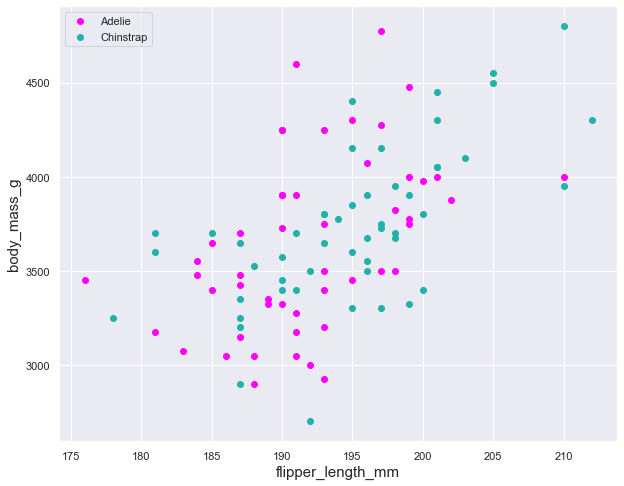

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

#import the data
df = sns.load_dataset("penguins").dropna()
df= df.iloc[96:197]
#df


X = df[["flipper_length_mm", "body_mass_g"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1
         
# Create target value array
y = df["species"].map(make_labels).to_numpy()

# Plot the data
penguins = ["Adelie", "Chinstrap"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.flipper_length_mm,
               temp_df.body_mass_g,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("flipper_length_mm", fontsize = 15)
ax.set_ylabel("body_mass_g", fontsize = 15)
ax.legend()
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.52      0.61      0.56        18

    accuracy                           0.59        41
   macro avg       0.59      0.59      0.58        41
weighted avg       0.59      0.59      0.59        41
 



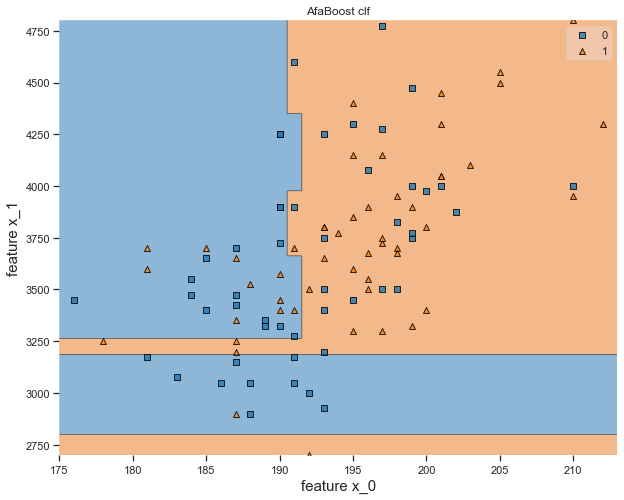

In [3]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.title("AfaBoost clf")
plt.grid()
plt.show()

In [5]:
X = df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")


Tree Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.94      0.94      0.94        18

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41
 



---

## Gradient Boosting 
Another popular boosting method is **gradient boosting**. This method works by sequentially adding predictors to an ensemble, each correcting is predecessor. The difference between this method and AdaBoost is that gradient boosting tries to fit the new predictor to the *residual errors* made by the previous predictor. Recall the residual error denoted by $error$. 

Given features ```X``` and regression values ```y```, we train a regression tree ```tree_reg1``` on this dat and then ```tree_reg1``` predicts a vector $\hat{y}_1$ of real values. Then, 

$$
y = \hat{y}_1 + error_1
$$

which implies, 
$$
y - \hat{y}_1 = error_1
$$

Next fit another regression tree, say ```tree_reg2```, with features ```X``` and labels $y_2 = y - \hat{y}1$. Then, ```tree_reg2``` predict a vector $\hat{y}_2$, with 

$$
error_1 = y_2 = \hat{y}_2 + error_2
$$

Thus, 

$$
y = \hat{y}_1 + error_1 = \hat{y}_1 + \hat{y}_2 + error_2, 
$$
where $error_1 > error_2$. This means that we have a better predictor by summing the predictions of ```tree_reg1``` and ```tree_reg2```!


In the following code cells we generate artifical quadratic data and then perform gradient boost with three regression trees. 

---

## Gradient Boosting Regression-Dataset "wine" Application

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



wine = pd.read_csv("/Users/rachelan/Rice University/Rice-INDE-577/Rice-INDE-577/Supervised Learning/Ensemble Learning/winequality-red.csv")
wine[0:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
wine.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
X=wine.drop(["quality"],axis=1)
y=wine[["quality"]]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)


In [29]:
# with new parameters
gb = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
# with default parameters
gb = GradientBoostingRegressor()
print(gb)

GradientBoostingRegressor()


In [30]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

GradientBoostingRegressor()

In [31]:
gb.fit(X_train, y_train)

/Users/rachelan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor()

In [32]:
y_pred = gb.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
 
print("MSE: %.2f" % MSE)

MSE: 0.36


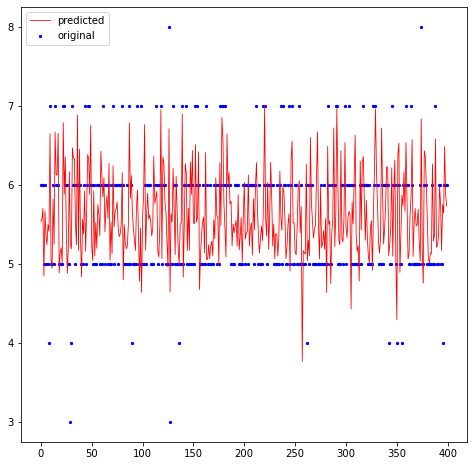

In [33]:


x_ax = range(len(y_test))
plt.figure(figsize=(8, 8))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

## Gradient Boosting from Scratch

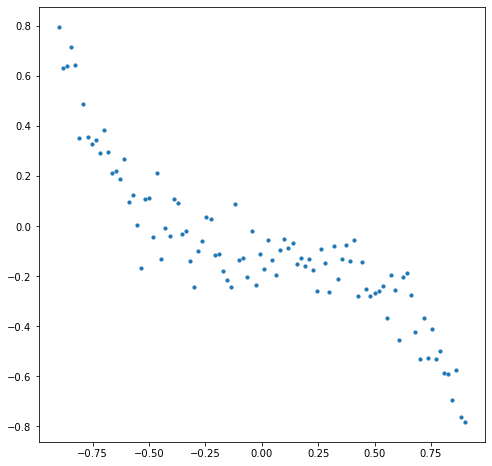

In [55]:
np.random.seed(0)
X = np.linspace(-.9, .9, 100)
y = -(X ** 3) + np.random.normal(-.09, .09, 100)
plt.figure(figsize=(8, 8))
plt.scatter(X, y, s=10)
plt.show()

In [56]:
from sklearn.tree import DecisionTreeRegressor

X_new = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)





tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)

y2 = y_train - tree_reg1.predict(X_train)

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train, y2)

y3 = y2 - tree_reg2.predict(X_train)

tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [57]:
# Optional hard coded final prediction
# y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

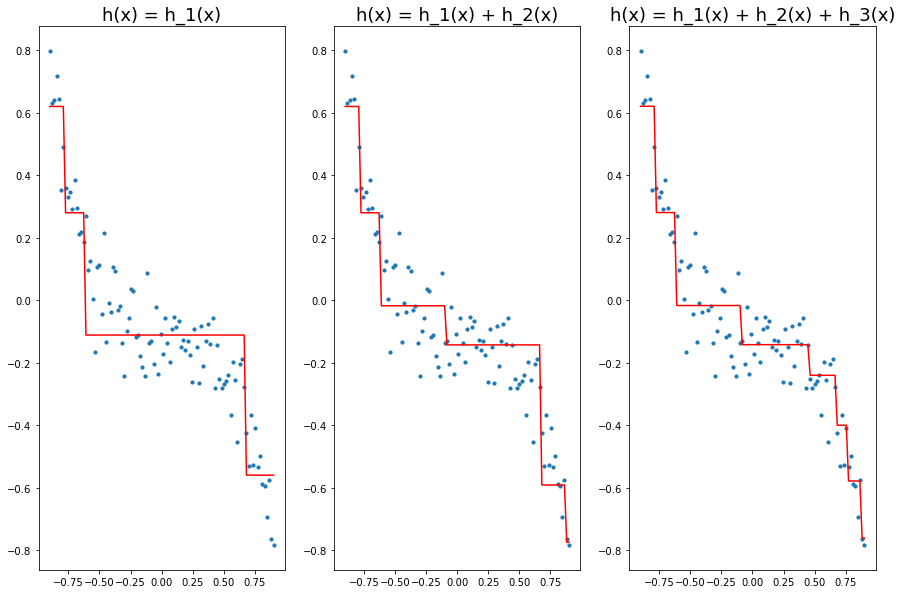

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(X, y, s=10)
ax1.plot(X, tree_reg1.predict(X_new), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

ax2.scatter(X, y, s=10)
ax2.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new), color = "red")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

ax3.scatter(X, y, s=10)
ax3.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new)+tree_reg3.predict(X_new), color = "red")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 150, learning_rate=0.05, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_new)

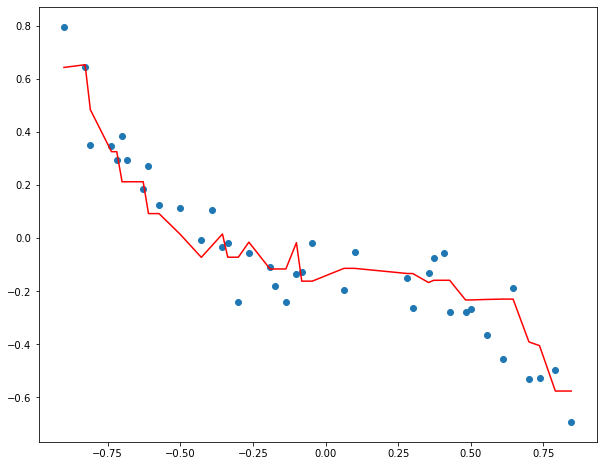

In [60]:

y_pred = gb_reg.predict(X_test)
points = [(x[0], y, z) for x, y, z in zip(X_test, y_pred, y_test)]
points.sort(key = lambda x : x[0])
X_new_test, y_new_pred, y_new_test = np.array([x[0] for x in points]), np.array([x[1] for x in points]), np.array([x[2] for x in points])
X_new_test = X_new_test.reshape(-1, 1)


plt.figure(figsize=(10, 8))
plt.scatter(X_new_test, y_new_test)
plt.plot(X_new_test, y_new_pred, color = "red")
plt.show()